In [33]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
cities_data = pd.read_csv("data/city_data.csv")
rides_data = pd.read_csv("data/ride_data.csv")




In [34]:
# Read the City 
cities_data.head()




,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [35]:
# read and Ride Data
rides_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [36]:
# Combine the data into a single dataset &
# Display the data table for preview
cities_and_rides = pd.merge(cities_data, rides_data, on='city')
cities_and_rides.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [37]:
# City Type (Urban, Suburban, Rural)
city_group=cities_and_rides.groupby(["city","type"])
# Average Fare ($) Per City
average_fare=city_group["fare"].mean().reset_index()
average_fare_by_type=average_fare.set_index('type')
average_fare_urban=average_fare_by_type.loc["Urban"]
average_fare_rural=average_fare_by_type.loc["Rural"]
average_fare_suburban=average_fare_by_type.loc["Suburban"]
# Total Number of Rides Per City
count_rides=city_group['ride_id'].count().reset_index()
count_rides_by_type=count_rides.set_index('type')
count_rides_urban=count_rides_by_type.loc["Urban"]
count_rides_rural=count_rides_by_type.loc["Rural"]
count_rides_suburban=count_rides_by_type.loc["Suburban"]
# Total Number of Drivers Per City
drivers=cities_data[["city","driver_count","type"]]
drivers_by_type=drivers.set_index('type')
drivers_urban=drivers_by_type.loc["Urban"]
drivers_rural=drivers_by_type.loc["Rural"]
drivers_suburban=drivers_by_type.loc["Suburban"]





## Bubble Plot of Ride Sharing Data

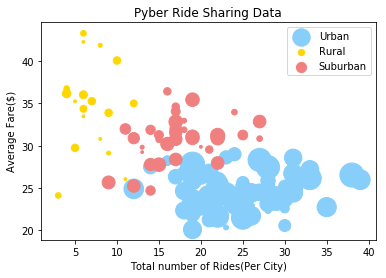

In [51]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
#mulitiply size function by a number

x_axis_urban= count_rides_urban['ride_id']
y_axis_urban= average_fare_urban['fare']
plt.scatter(x_axis_urban,y_axis_urban, color="lightskyblue",s=drivers_urban['driver_count']*8,alpha=1.0,
           label="Urban")

#plot data for Rural cities
x_axis_rural= count_rides_rural['ride_id']
y_axis_rural= average_fare_rural['fare']
plt.scatter(x_axis_rural,y_axis_rural,color="gold", s=drivers_rural['driver_count']*8,alpha=1.0,
            label="Rural")

#plot data for Suburban cities
x_axis_suburban= count_rides_suburban['ride_id']
y_axis_suburban= average_fare_suburban['fare']
plt.scatter(x_axis_suburban,y_axis_suburban,color="lightcoral",s=drivers_suburban['driver_count']*8,
            alpha=1.0, label="Suburban")
plt.legend(loc="best")
plt.xlabel("Total number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data")
plt.show()

## Total Fares by City Type

In [40]:
# Calculate Type Percents


#total fares from data
total_fares=cities_and_rides["fare"].sum()
#percentage of total fares by city type
city_type=cities_and_rides.groupby('type')
total_fares_by_type=city_type.sum().reset_index()

total_fares_by_type
type_index=total_fares_by_type.set_index('type')
rural_fare=type_index.loc[["Rural"],["fare"]]
percentage_rural_fare=((rural_fare["fare"])/(total_fares)*100).values[0]
print(percentage_rural_fare)
urban_fare=type_index.loc[["Urban"],["fare"]]
percentage_urban_fare=((urban_fare["fare"])/(total_fares)*100).values[0]
print(percentage_urban_fare)
suburban_fare=type_index.loc[["Suburban"],["fare"]]
percentage_suburban_fare=((suburban_fare["fare"])/(total_fares)*100).values[0]
print(percentage_suburban_fare)

6.811492974983412
62.72463496228436
30.46387206273221


In [52]:
# Build Pie Chart
#pie charts
labels= ["Rural", "Urban", "Suburban"]
sizes = [percentage_rural_fare, percentage_urban_fare, percentage_suburban_fare]
colors= ["gold", "lightskyblue", "lightcoral"]
explode= (0,0.1,0)
#sizes[0].values[0]

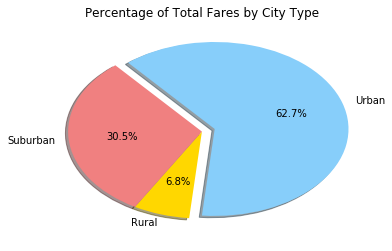

In [53]:
plt.title("Percentage of Total Fares by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=240)        
plt.axes().set_aspect(aspect=0.65)
plt.show()

## Total Rides by City Type

In [41]:
#total rides from data
total_rides=cities_and_rides["ride_id"].count()
#percentage of total rides by city type
total_rides_by_type=city_type.count().reset_index()
type_index=total_rides_by_type.set_index('type')
rural_rides=type_index.loc[["Rural"],["ride_id"]]
percentage_rural_rides=((rural_rides["ride_id"])/(total_rides)*100).values[0]
print(percentage_rural_rides)
urban_rides=type_index.loc[["Urban"],["ride_id"]]
percentage_urban_rides=((urban_rides["ride_id"])/(total_rides)*100).values[0]
print(percentage_urban_rides)
suburban_rides=type_index.loc[["Suburban"],["ride_id"]]
percentage_suburban_rides=((suburban_rides["ride_id"])/(total_rides)*100).values[0]
print(percentage_suburban_rides)

5.263157894736842
68.42105263157895
26.31578947368421


In [54]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure
# Build Pie Chart
#pie charts
labels= ["Rural", "Urban", "Suburban"]
sizes = [percentage_rural_rides, percentage_urban_rides, percentage_suburban_rides]
colors= ["gold", "lightskyblue", "lightcoral"]
explode= (0,0.1,0)
#sizes[0].values[0]

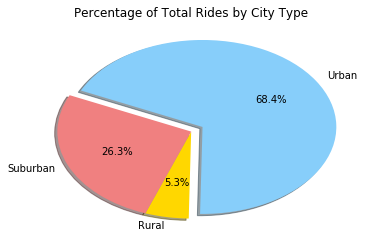

In [55]:
plt.title("Percentage of Total Rides by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=250)        
plt.axes().set_aspect(aspect=0.65)
plt.show()

## Total Drivers by City Type

In [42]:
#total drivers from data
total_drivers=cities_data["driver_count"].sum()
#percentage of total drivers by city type
city_type=cities_data.groupby('type')
total_drivers_by_type=city_type.sum().reset_index()
type_index=total_drivers_by_type.set_index('type')
rural_drivers=type_index.loc[["Rural"],["driver_count"]]
percentage_rural_drivers=((rural_drivers["driver_count"])/(total_drivers)*100).values[0]
print(percentage_rural_drivers)
urban_drivers=type_index.loc[["Urban"],["driver_count"]]
percentage_urban_drivers=((urban_drivers["driver_count"])/(total_drivers)*100).values[0]
print(percentage_urban_drivers)
suburban_drivers=type_index.loc[["Suburban"],["driver_count"]]
percentage_suburban_drivers=((suburban_drivers["driver_count"])/(total_drivers)*100).values[0]
print(percentage_suburban_drivers)

2.6236125126135215
80.89471913891691
16.481668348469558


In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure
labels= ["Rural", "Urban", "Suburban"]
sizes = [percentage_rural_drivers, percentage_urban_drivers, percentage_suburban_drivers]
colors= ["gold", "lightskyblue", "lightcoral"]
explode= (0,0.1,0)
#sizes[0].values[0]

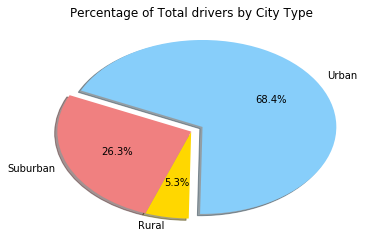

In [56]:
plt.title("Percentage of Total drivers by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=250)        
plt.axes().set_aspect(aspect=0.65)
plt.show()